In [1]:
%matplotlib inline
%pprint off

from __future__ import print_function, division

import numpy as np
import matplotlib.pyplot as plt

from skimage import img_as_ubyte
from skimage.color import rgb2gray
from skimage.io import imread, imshow
from skimage.measure import label, regionprops
from skimage.morphology import binary_closing, binary_opening, binary_dilation, binary_erosion, disk
from skimage.filters import threshold_otsu
from skimage.transform import rescale

Pretty printing has been turned OFF


## Segmentation of toy example

In this exercise, you will have to automatically find how many type of coins are present on the picture `coins.jpg`.
Therefore, read the image as `ubyte` and display it. In order to speed-up the subsequent processes, divide the scale of the image by a factor of 4.

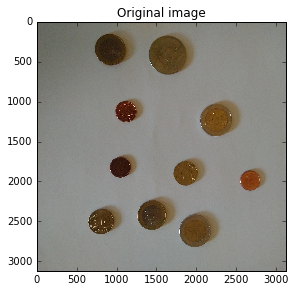

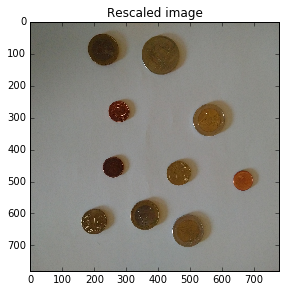

In [2]:
img_coins = imread('./images/coins.jpg')
img_coins = img_as_ubyte(img_coins)
plt.figure()
imshow(img_coins)
plt.title('Original image')

img_coins_rescaled = rescale(img_coins, 0.25)
plt.figure()
imshow(img_coins_rescaled)
plt.title('Rescaled image')

Subsquently, threshold the image using a global Otsu's thresholding after converting the image into gray scale. Display the image.

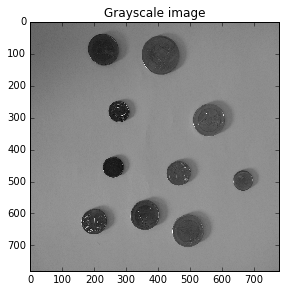

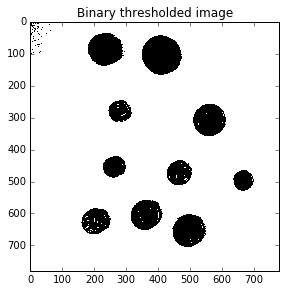

In [3]:
img_coins_gray = rgb2gray(img_coins_rescaled)
plt.figure()
imshow(img_coins_gray)
plt.title('Grayscale image')

img_coins_bw = img_coins_gray >= threshold_otsu(img_coins_gray)
plt.figure()
imshow(img_coins_bw)
plt.title('Binary thresholded image')

Clean the image using some morphological operations, i.e. erosion, dilation, opening, closing ...

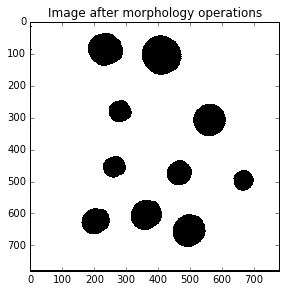

In [4]:
img_coins_bw = binary_closing(img_coins_bw, disk(1))
img_coins_bw = binary_opening(img_coins_bw, disk(5))
img_coins_bw = binary_closing(img_coins_bw, disk(3))

plt.figure()
imshow(img_coins_bw)
plt.title('Image after morphology operations')


Using the functions [`label`](http://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.label) and [`regionprops`](http://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.regionprops) determine, the radius of each region and determine the number of type of coins in the image.

1. Show the image with the different labels.
1. How many regions do you find?
1. Display the radius of each region. Draw the corresponding circle on the image.


Region  0
Region is not a coin as it is not circular.

Region  1
Radius: 52.7177732484
Center: (87.65215897377162, 234.43030580689498)

Region  2
Radius: 61.3282122285
Center: (105.7244414353419, 410.17670954637777)

Region  3
Radius: 34.8931986876
Center: (281.2167320261438, 280.54457516339869)

Region  4
Radius: 50.7362991316
Center: (308.44491158649686, 559.48769630270806)

Region  5
Radius: 34.6184448161
Center: (454.39601593625497, 262.64648074369188)

Region  6
Radius: 38.9168143411
Center: (473.64670029424127, 465.37011349306431)

Region  7
Radius: 31.8254938349
Center: (496.47045883092392, 665.7077309868007)

Region  8
Radius: 48.045637623
Center: (603.92526199669055, 362.3073634859349)

Region  9
Radius: 42.4306577401
Center: (623.54367043847242, 204.30091937765206)

Region  10
Radius: 51.1860202905
Center: (653.1508929656178, 495.62726278702468)

Number of regions identified: 11
Number of coins: 10


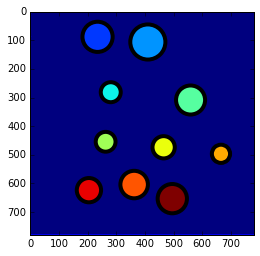

In [5]:
[img_coins_labelled, regions] = label(img_coins_bw, background=1, return_num=True )

img_coins_properties = regionprops(img_coins_labelled)

fig,ax = plt.subplots(1)
ax.set_aspect('equal')

ax.imshow(img_coins_labelled)

no_of_coins = 0
for i in range(len(img_coins_properties)):
    print('\nRegion ', i)
    
    radius = img_coins_properties[i].equivalent_diameter/2
    center = img_coins_properties[i].centroid 
    axis_lenth = img_coins_properties[i].major_axis_length
    
    if axis_lenth < 3*radius:
        no_of_coins += 1
        print('Radius:',radius)
        print('Center:', center)
        circle = plt.Circle((center[1], center[0]), radius, color='k', linewidth='4', fill=False)
        ax.add_patch(circle)
    else:
        print('Region is not a coin as it is not circular.')
        
print('\nNumber of regions identified:',regions)
print('Number of coins:', no_of_coins)


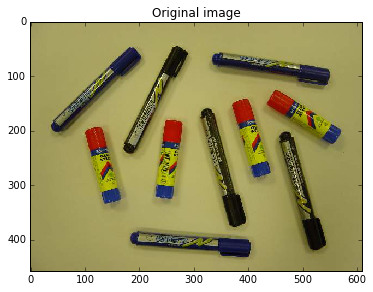

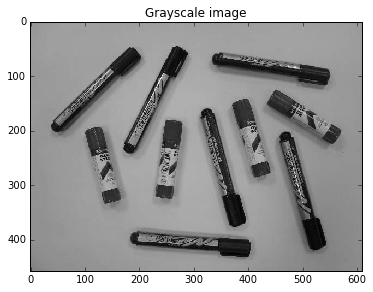

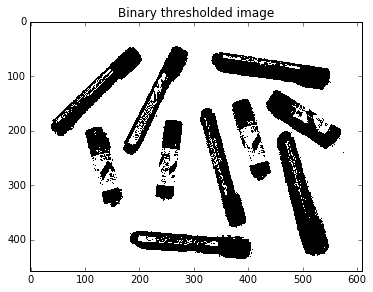

In [6]:
img_objects = imread('./images/objets4.jpg')
img_objects = img_as_ubyte(img_objects)
plt.figure()
imshow(img_objects)
plt.title('Original image')

img_objects_gray = rgb2gray(img_objects)
plt.figure()
imshow(img_objects_gray)
plt.title('Grayscale image')

img_objects_bw = img_objects_gray >= threshold_otsu(img_coins_gray)+0.1
plt.figure()
imshow(img_objects_bw)
plt.title('Binary thresholded image')

The image contains more graylevels and so we apply the morphology operation first on the grayscale image and then binarize the image.


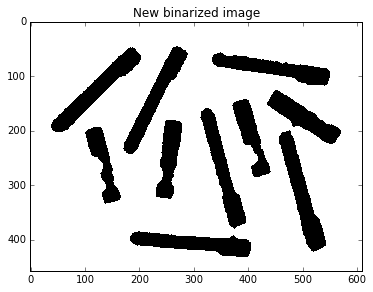

In [7]:
from skimage.morphology import closing, opening

print('The image contains more graylevels and so we apply the morphology operation first on the grayscale image and then binarize the image.')
img_objects_opened = opening(img_objects_gray, disk(12))
img_objects_closed = closing(img_objects_opened, disk(3))

img_objects_bw = img_objects_closed >= threshold_otsu(img_objects_closed)

plt.figure()
imshow(img_objects_bw)
plt.title('New binarized image')


Eccentricity is used to distinguish pens from gums because gums are smaller and thicker when compared to pens and have less eccentricity. 

Region  0
Eccentricity: 0.992278149755

Region  1
Eccentricity: 0.990179709589

Region  2
Eccentricity: 0.991940098173

Region  3
Eccentricity: 0.970999759747

Region  4
Eccentricity: 0.978005586861

Region  5
Eccentricity: 0.992899048772

Region  6
Eccentricity: 0.978458207605

Region  7
Eccentricity: 0.980718900039

Region  8
Eccentricity: 0.991349853742

Region  9
Eccentricity: 0.99224090111

Number of objects detected: 10
Number of pens: 6
Number of glues: 4


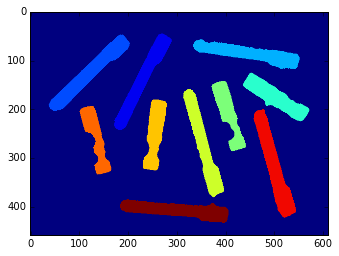

In [8]:
[img_objects_labelled, regions] = label(img_objects_bw, background=1, return_num=True )

img_objects_properties = regionprops(img_objects_labelled)

fig,ax = plt.subplots(1)
ax.set_aspect('equal')

ax.imshow(img_objects_labelled)

no_regions = 0
no_pens = 0
no_glues = 0

print('Eccentricity is used to distinguish pens from gums because gums are smaller and thicker when compared to pens and have less eccentricity. ')

for i in range(len(img_objects_properties)):
    print('\nRegion ', i)
    
    eccentricity = img_objects_properties[i].eccentricity
    print('Eccentricity:',eccentricity)
    
    no_regions = no_regions + 1
    if eccentricity > 0.99:
        no_pens = no_pens + 1
    elif eccentricity > 0.95:
        no_glues = no_glues + 1
    
        
print('\nNumber of objects detected:', no_regions)        
print('Number of pens:',no_pens)
print('Number of glues:', no_glues)